In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

import pandas as pd

import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt

In [2]:
data = pg.physics.traveltime.load('data.sgt')
print(data)

Data: Sensors: 41 data: 420, nonzero entries: ['g', 's', 't', 'valid']


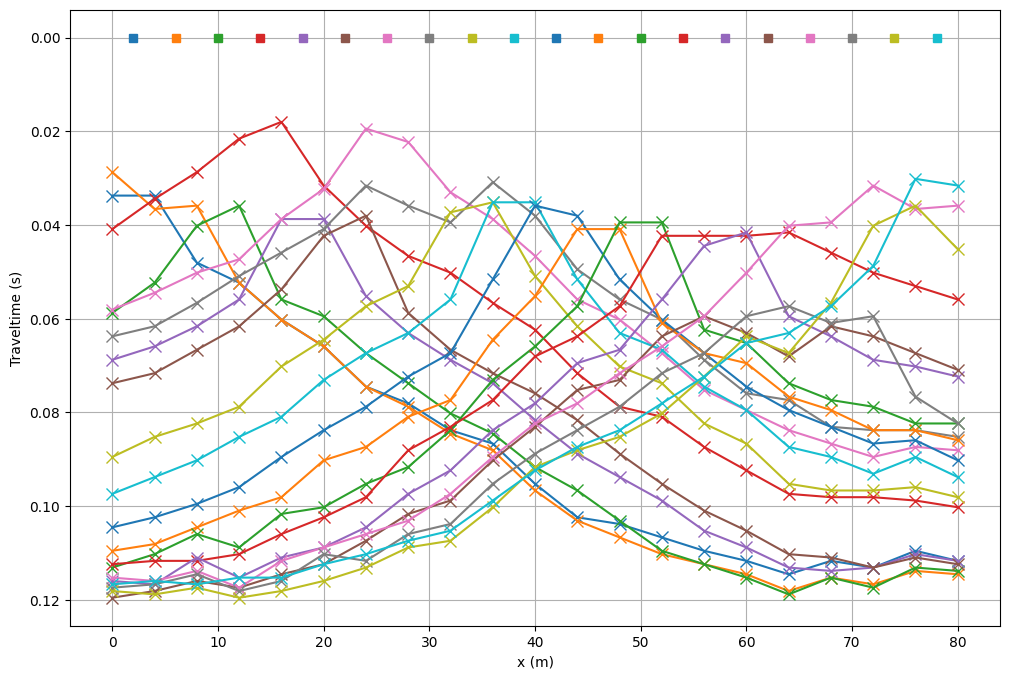

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
tt.show(data, ax=ax)

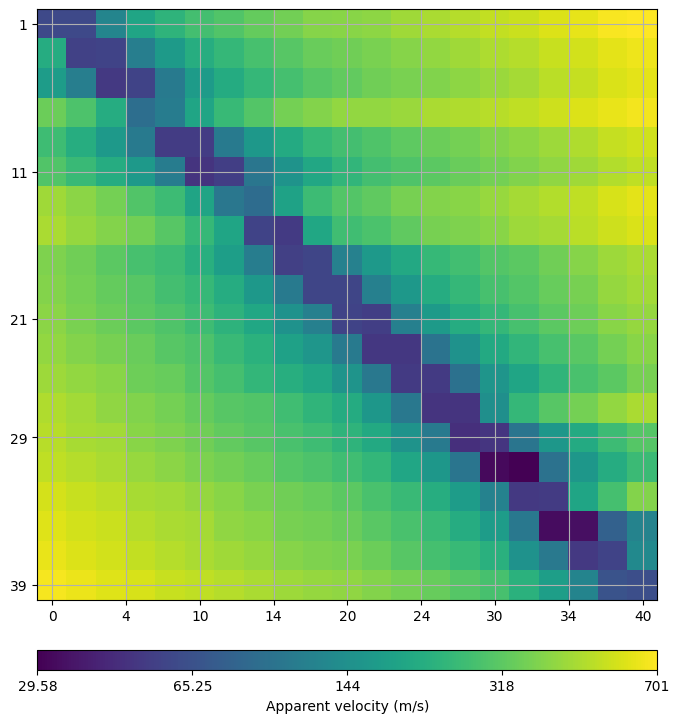

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

ax, cbar = mgr.showData(ax=ax)

In [4]:
mgr = tt.TravelTimeManager(data)
mgr.invert(secNodes=5, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=100, vBottom=3000, verbose=1, usegradient=False)

./core/src/meshentities.cpp:36		GIMLI::Boundary* GIMLI::findBoundary_(const std::set<Boundary*>&)  pls. check, this should not happen.  There is more than one boundary defined.2
Boundary 0x55debf8b5fe0 rtti: 22 id: 0	N: 0 1  marker: 1 
Boundary 0x55debf968b00 rtti: 22 id: 82	N: 4 0  marker: -1 
30/11/24 - 19:41:19 - pyGIMLi - INFO - Found 1 regions.
30/11/24 - 19:41:19 - pyGIMLi - INFO - Found 1 regions.
30/11/24 - 19:41:20 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
30/11/24 - 19:41:20 - pyGIMLi - INFO - Creating forward mesh from region infos.
30/11/24 - 19:41:20 - pyGIMLi - INFO - Creating refined mesh (secnodes: 5) to solve forward task.
30/11/24 - 19:41:20 - pyGIMLi - INFO - Create gradient starting model. 100: 3000
30/11/24 - 19:41:20 - pyGIMLi - INFO - Created startmodel from forward operator: 1242, min/max=0.000333/0.010000
30/11/24 - 19:41:20 -

Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  2

Statistics:

  Input vertices: 83
  Input segments: 84
  Input holes: 0

  Mesh vertices: 691
  Mesh triangles: 1242
  Mesh edges: 1932
  Mesh exterior boundary edges: 138
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 138

min/max(dweight) = 278.812/1855.46
fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7f61eea3fd30>
Data transformation: <pgcore._pygimli_.RTrans object at 0x7f61e65c0630>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f

1242 [271.8556899676451,...,1580.729551907354]

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7f61ee80a790>)

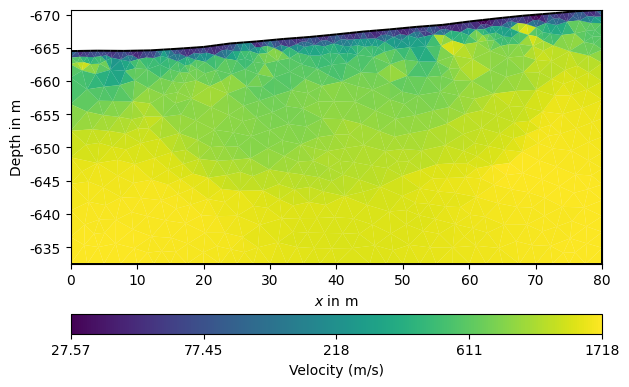

In [5]:
mgr.showResult()

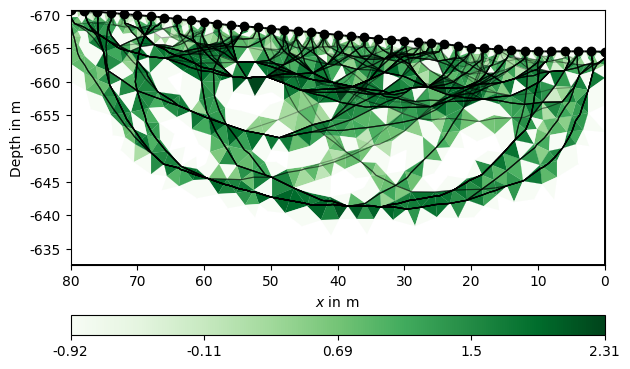

In [8]:
fig, ax = plt.subplots()
sensors = data.sensorPositions()
mgr.showCoverage(ax=ax, cMap="Greens")
mgr.drawRayPaths(ax=ax, color="k", alpha=0.3)
p = ax.plot(sensors[:, 0], sensors[:, 1], "ko")
ax.invert_xaxis()